In [1]:
import pandas as pd
import numpy as np

In [2]:
housing_cond = pd.read_csv("https://data.wprdc.org/dataset/12edd529-5119-49c7-92b5-15314b3ae25e/resource/a1f3ffd9-34bf-4255-97a8-af8084894159/download/poorhousingconditions.csv", )
tract_data = pd.read_csv("http://pghgis-pittsburghpa.opendata.arcgis.com/datasets/e1894e5ab8ea4889923efd810b13f760_0.csv")

tract_data.head()

,objectid,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,aland10,...,objectid_1,tractce10_1,cnt_tractce10,sum_lowmod2018,sum_lowmoduniv,lowmodperct,lowmodpercanno,cdbg2018,Shape__Area,Shape__Length
0,1,42,3,40500,1,420030405001,Block Group 1,G5030,S,268195,...,7,40500,2,2775,2985,92.964824,92.96,Yes,5.079492e+06,10442.036450
1,2,42,3,40400,1,420030404001,Block Group 1,G5030,S,75472,...,6,40400,2,1365,2020,67.574257,67.57,Yes,2.105489e+06,6609.688123
2,3,42,3,40200,2,420030402002,Block Group 2,G5030,S,282679,...,5,40200,2,1070,1290,82.945736,82.94,Yes,5.998649e+06,18280.484081
3,4,42,3,30500,2,420030305002,Block Group 2,G5030,S,284548,...,4,30500,2,1635,2130,76.760563,76.76,Yes,7.203631e+06,15694.771444
4,5,42,3,980000,1,420039800001,Block Group 1,G5030,S,637235,...,125,980000,1,65,220,29.545455,29.54,No,7.764866e+06,13581.875089


In [3]:
housing_cond.head()

,TRACT,PPoorCon
0,431100,0.022593
1,432300,0.015898
2,563800,0.016079
3,563300,0.018003
4,451104,0.009339


In [4]:
#remove duplicated values
housing_cond = housing_cond[~housing_cond.index.duplicated()]
    
#remove the last two digits of the TRACT number in housing_cond dataset
for i, val in enumerate(housing_cond['TRACT']):
    housing_cond.loc[i, 'TRACT'] = str(val)[:-2]
housing_cond.head()

,TRACT,PPoorCon
0,4311,0.022593
1,4323,0.015898
2,5638,0.016079
3,5633,0.018003
4,4511,0.009339


In [5]:
#remove irrelevant columns from tract_data
tract_cols = list(tract_data.columns)
tract_cols.remove("hood")
tract_cols.remove("tracttext")

tract_data = tract_data.drop(tract_cols, axis=1)

In [15]:
# Join the two datasets over the tract number
tract_data = tract_data[~tract_data.index.duplicated()]
tract_data['tracttext'] = tract_data['tracttext'].astype(str)
#housing_cond['TRACT']=housing_cond['TRACT'].astype(int)
df3 = pd.merge(housing_cond, tract_data, left_on="TRACT", right_on="tracttext")
df3 = df3.sort_values(by=['PPoorCon'], ascending=False)
print(df3.to_string())

    TRACT  PPoorCon                       hood tracttext
59   2412  0.126110              Spring Garden      2412
49   2614  0.082067                Perry South      2614
128  1207  0.081522              Homewood West      1207
74   1016  0.068966                   Garfield      1016
101  1301  0.058333             Homewood North      1301
98   1303  0.058168             Homewood South      1303
127  1204  0.057522                    Larimer      1204
99   1304  0.054908             Homewood South      1304
19   2715  0.054889         Marshall-Shadeland      2715
61   2507  0.054264       California-Kirkbride      2507
89   5623  0.053819                  Hazelwood      5623
112   605  0.049327                Polish Hill       605
11   4810  0.044554       Mount Oliver Borough      4810
75   1017  0.040712                   Garfield      1017
73    402  0.037139               West Oakland       402
54   1803  0.036925                  Allentown      1803
3     501  0.036123            

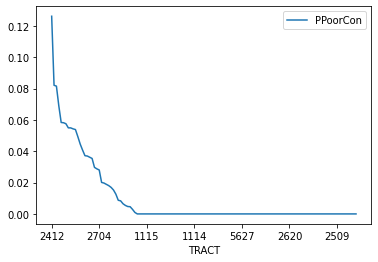

In [17]:
import matplotlib.pyplot as plt
df3.plot(x='TRACT', y='PPoorCon')

In [18]:
df3['PPoorCon'].describe()

count    129.000000
mean       0.009929
std        0.021574
min        0.000000
25%        0.000000
50%        0.000000
75%        0.004720
max        0.126110
Name: PPoorCon, dtype: float64

**Conclusion**

To prepare the data, I converted the original TRACT numbers to neighborhood names using a dataset provided by the 2010 US Census. After processing the data, I noticed that the majority of Pittsburgh neighborhoods in the dataset were given a PPoorCon (Percentage of Poor Housing Conditions) value of 0. This means that the independent surveyors found no houses in the sample that were in poor condition. While the data is not particularly useful for comparing high-end neigborhoods (those with a PPoorCon of 0), it can give a good metric to compare neighborhoods with worse housing quality (PPoorCon > 0). After analyzing the data, I found 36 Pittsburgh neighborhoods had a PPoorCon > 0, the mean PPoorCon was .0099 with a std of .0215. The dataset indicates that the worst 5 neighborhoods in terms of housing quality are Spring Garden, Perry South, Homewood West, Garfield, and Homewood North, with Spring Garden being the worst with a PPoorCon of .1261. 